In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/Research/FFF/Train'
valid_path = '/content/drive/MyDrive/Research/FFF/Test'


In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Research/FFF/Train/*')

In [ ]:
x = Flatten()(inception.output)
#x = Dense(1000, activation='relu')(x)
#x = Dropout(0.2)(x)
#x = Dense(11, activation='softmax')(x)

prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model = Model(inputs=inception.input, outputs=prediction)


In [ ]:
model.summary()


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 3835 images belonging to 11 classes.
Found 764 images belonging to 11 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
30/30 [==============================] - 1514s 50s/step - loss: 8.1765 - accuracy: 0.4769 - val_loss: 1.9953 - val_accuracy: 0.7199
Epoch 2/100
30/30 [==============================] - 52s 2s/step - loss: 0.8819 - accuracy: 0.8516 - val_loss: 1.5248 - val_accuracy: 0.8115
Epoch 3/100
30/30 [==============================] - 52s 2s/step - loss: 0.2709 - accuracy: 0.9309 - val_loss: 1.4069 - val_accuracy: 0.8351
Epoch 4/100
30/30 [==============================] - 51s 2s/step - loss: 0.2094 - accuracy: 0.9445 - val_loss: 1.3685 - val_accuracy: 0.8364
Epoch 5/100
30/30 [==============================] - 52s 2s/step - loss: 0.0964 - accuracy: 0.9698 - val_loss: 0.8985 - val_accuracy: 0.8835
Epoch 6/100
30/30 [==============================] - 52s 2s/step - loss: 0.0835 - accuracy: 0.9763 - val_loss: 1.0666 - val_accuracy: 0.8717
Epoch 7/100
30/30 [==============================] - 52s 2s/step - loss: 0.1034 - accuracy: 0.9703 - val_loss: 1.1954 - val_accuracy: 0.8482
Epoch 8/10

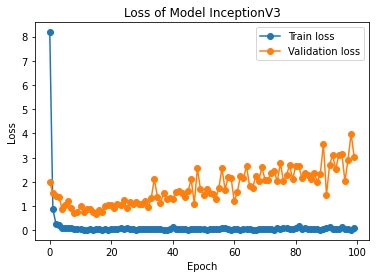

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'],'o-', label='Train loss')
plt.plot(r.history['val_loss'],'o-', label='Validation loss')
plt.title("Loss of Model InceptionV3")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss2')


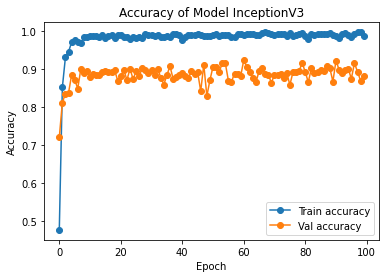

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy
plt.plot(r.history['accuracy'],'o-', label='Train accuracy')
plt.plot(r.history['val_accuracy'],'o-', label='Val accuracy')
plt.title("Accuracy of Model InceptionV3")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


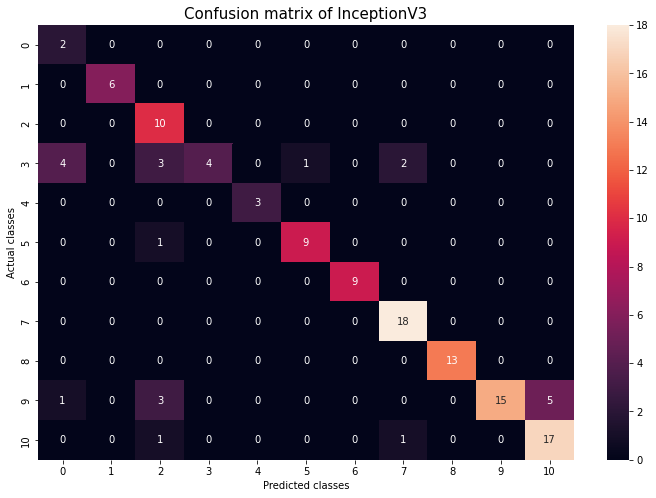

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set
x_test, y_test = next(val_ds)
y_predict = model.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of InceptionV3', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

In [ ]:

import tensorflow as tf

from keras.models import load_model

model.save('100_inception_facefeatures_new_model.h5')

In [ ]:
########## End ##############

In [ ]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(classes,test))

the accuracy obtained on the test set is: 0.828125


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test, classes))

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       1.00      1.00      1.00         6
           2       0.56      1.00      0.71        10
           3       1.00      0.29      0.44        14
           4       1.00      1.00      1.00         3
           5       0.90      0.90      0.90        10
           6       1.00      1.00      1.00         9
           7       0.86      1.00      0.92        18
           8       1.00      1.00      1.00        13
           9       1.00      0.62      0.77        24
          10       0.77      0.89      0.83        19

    accuracy                           0.83       128
   macro avg       0.85      0.88      0.82       128
weighted avg       0.89      0.83      0.82       128



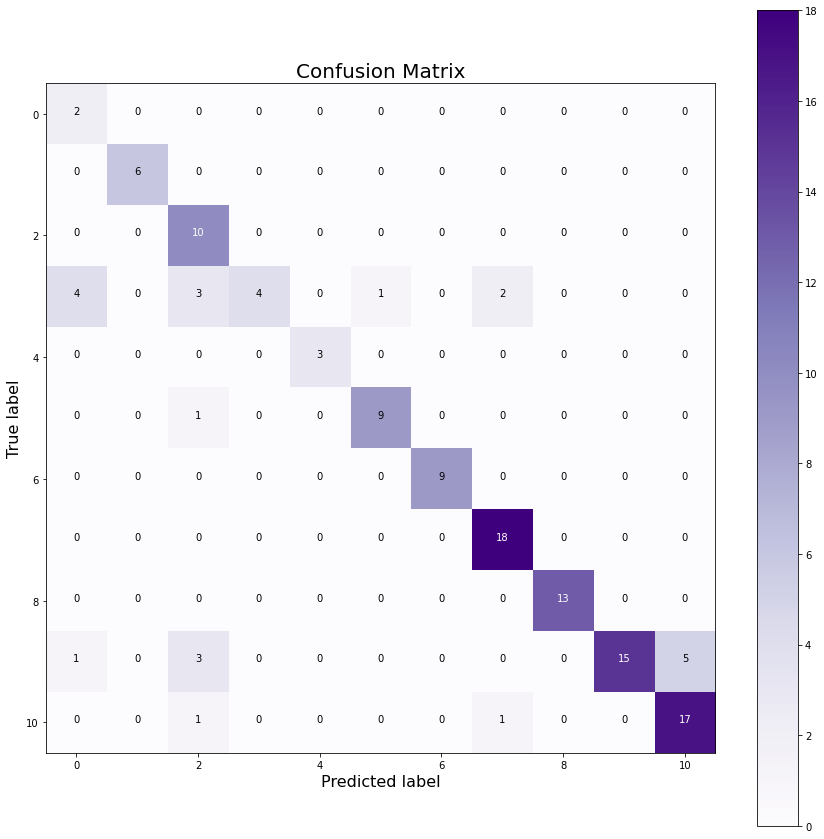

In [ ]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    #tick_marks = np.arange(len(labels))
    #plt.xticks(tick_marks, labels, rotation=45)
    #plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(x_test, batch_size = 128, verbose = 0)
plot_confusion_matrix(test, classes)

In [ ]:
###################

In [ ]:
!pip install tf-slim
import os
import numpy as np
from PIL import Image
from imageio import imread
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tf_slim as slim
from tf_slim.nets import inception
import tf_slim as slim
import cv2
import matplotlib.pyplot as plt

     |████████████████████████████████| 352 kB 12.6 MB/s 
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
####

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pretrained_model=InceptionV3(input_shape=(150,150,3),
                             include_top=False,
                             weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pretrained_model.layers:
  layer.trainable=False